In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
salary = pd.read_csv('D:/ML/NBA salary/NBA_season1718_salary.csv')
stats= pd.read_csv('D:/ML/NBA salary/Seasons_Stats.csv')


In [3]:
stats.head(10)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [4]:
salary = salary[['Player', 'season17_18']]

In [5]:
salary = salary.rename(columns={'season17_18':'salary17_18'})

In [6]:
salary['salary17_18'] = salary['salary17_18']/1000000

In [7]:
stats = stats[stats['Year'] >= 2017]

In [8]:
stats17 = stats[['Year','Player','Pos','Age','G','PER','MP','PTS','AST','TRB','TOV','BLK','STL']]

In [9]:
stats17 = stats17.drop_duplicates(subset=['Player'], keep='first')
a = ['MPG','PPG','APG','RPG','TOPG','BPG','SPG']
b = ['MP','PTS','AST','TRB','TOV','BLK','STL'] 

In [10]:
stats17.head() 

,Year,Player,Pos,Age,G,PER,MP,PTS,AST,TRB,TOV,BLK,STL
24096,2017.0,Alex Abrines,SG,23.0,68.0,10.1,1055.0,406.0,40.0,86.0,33.0,8.0,37.0
24097,2017.0,Quincy Acy,PF,26.0,38.0,11.8,558.0,222.0,18.0,115.0,21.0,15.0,14.0
24100,2017.0,Steven Adams,C,23.0,80.0,16.5,2389.0,905.0,86.0,615.0,146.0,78.0,88.0
24101,2017.0,Arron Afflalo,SG,31.0,61.0,9.0,1580.0,515.0,78.0,125.0,42.0,7.0,21.0
24102,2017.0,Alexis Ajinca,C,28.0,39.0,12.9,584.0,207.0,12.0,177.0,31.0,22.0,20.0


In [11]:
for i,s in zip(a,b):
    stats17[i] = stats17[s] / stats17['G']

stats17.drop(b,axis=1,inplace=True)
stats17.drop(['G'],axis=1,inplace=True)
stats17.loc[stats17['Pos'] == 'PF-C','Pos'] = 'PF'
stats = pd.merge(stats17, salary) 

In [12]:
stats.head()

,Year,Player,Pos,Age,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,salary17_18
0,2017.0,Alex Abrines,SG,23.0,10.1,15.514706,5.970588,0.588235,1.264706,0.485294,0.117647,0.544118,5.725000
1,2017.0,Quincy Acy,PF,26.0,11.8,14.684211,5.842105,0.473684,3.026316,0.552632,0.394737,0.368421,1.709538
2,2017.0,Steven Adams,C,23.0,16.5,29.862500,11.312500,1.075000,7.687500,1.825000,0.975000,1.100000,22.471910
3,2017.0,Arron Afflalo,SG,31.0,9.0,25.901639,8.442623,1.278689,2.049180,0.688525,0.114754,0.344262,2.328652
4,2017.0,Arron Afflalo,SG,31.0,9.0,25.901639,8.442623,1.278689,2.049180,0.688525,0.114754,0.344262,1.500000


In [13]:
stats = stats.drop_duplicates(subset=['Player'])

In [14]:
stats = stats.sort_values(by='PPG', ascending=False)

In [15]:
heat = stats.drop('Year', axis=1)

In [16]:
heat.corr()['salary17_18'].sort_values(ascending=False)

salary17_18    1.000000
PPG            0.708282
MPG            0.675666
TOPG           0.591155
RPG            0.556520
PER            0.548908
SPG            0.515406
APG            0.492047
BPG            0.335030
Age            0.234489
Name: salary17_18, dtype: float64

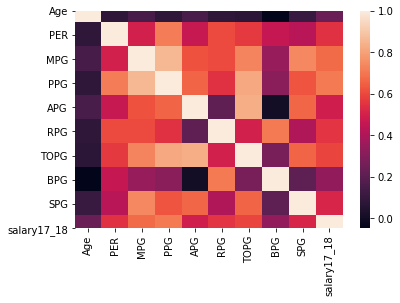

In [17]:
sns.heatmap(heat.corr())

In [19]:
def convert(df, feature):
    tmp = pd.get_dummies(df[feature], prefix=feature)
    tmp = tmp.drop(feature + '_' + df[feature].mode()[1], axis=1)
    df = df.drop(feature, axis=1)
    res = pd.concat([df, tmp], axis=1)
    return res

In [20]:
stats = convert(stats,'Pos')

In [22]:
stats = stats.dropna()
Y = stats['salary17_18']
X = stats.drop(['salary17_18','Year', 'Player'],axis=1)

In [23]:
stats.head()

,Year,Player,Age,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,salary17_18,Pos_C,Pos_PF,Pos_PG,Pos_SF
418,2017.0,Russell Westbrook,28.0,30.6,34.592593,31.580247,10.370370,10.666667,5.407407,0.382716,1.641975,28.530608,0,0,1,0
164,2017.0,James Harden,27.0,27.3,36.382716,29.086420,11.185185,8.135802,5.728395,0.456790,1.481481,28.299399,0,0,1,0
384,2017.0,Isaiah Thomas,27.0,26.5,33.802632,28.934211,5.907895,2.697368,2.763158,0.171053,0.921053,6.261395,0,0,1,0
97,2017.0,Anthony Davis,23.0,27.5,36.106667,27.986667,2.093333,11.813333,2.413333,2.226667,1.253333,23.775506,1,0,0,0
105,2017.0,DeMar DeRozan,27.0,24.0,35.405405,27.297297,3.918919,5.216216,2.432432,0.175676,1.054054,27.739975,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)  

In [25]:
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lr_pred = lr.predict(x_test)

In [27]:
import xgboost as xgb

In [28]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1, silent=True) 
model_xgb.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [29]:
xgb_pred = model_xgb.predict(x_test)

In [30]:
pred = 0.7 * lr_pred + 0.3 * xgb_pred
x_test['Pred_Y'] = pred
dt = pd.merge(stats, x_test,how = 'right')
x_test.drop(['Pred_Y'],axis=1,inplace=True)
dt = dt[['Player', 'salary17_18','Pred_Y']]
dt.sort_values(by = 'salary17_18', ascending = False,inplace=True)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

In [31]:
print('RMSE is', rmse)
print('R squared is', r2)

RMSE is 3.675218704667789
R squared is 0.764957599247022


In [32]:
dt.head(10)

,Player,salary17_18,Pred_Y
14,Paul Millsap,31.269231,21.275351
1,Kevin Durant,25.000000,24.277026
13,Chris Paul,24.599495,21.425516
5,C.J. McCollum,23.962573,18.175327
32,Andre Drummond,23.775506,18.170233
0,Anthony Davis,23.775506,25.137605
4,Bradley Beal,23.775506,17.732049
23,J.J. Redick,23.000000,12.578700
10,Kevin Love,22.642350,19.753855
7,Brook Lopez,22.642350,17.782792
